In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from typing import List
import time

In [12]:
num_of_photos = 5

In [13]:
def show(img, cmap=cv.COLOR_BGR2RGB):
    plt.imshow(cv.cvtColor(img, cmap))
    plt.show()

### Zad. 1 Przygotuj zestaw danych, zrób kilka zdjęć elementu który będzie wykrywany oraz nagraj film na którym znajduje się ten element wraz z innymi rzeczami.

In [112]:
img_data = [cv.imread(f"./data/photo{i}.jpg") for i in range(1, num_of_photos + 1)]

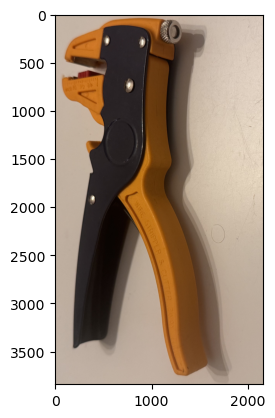

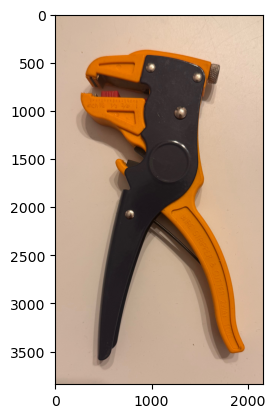

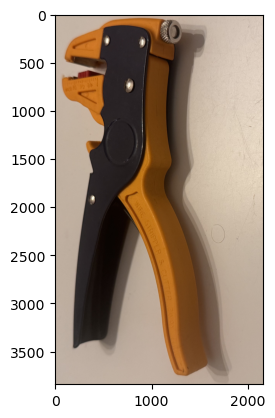

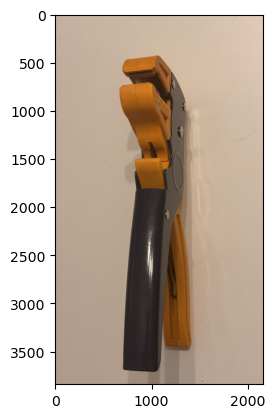

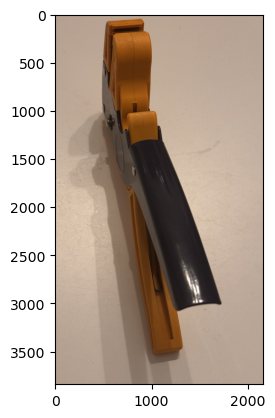

In [98]:
for file in img_data:
    show(file)

### Zad. 2 Przygotuj zdjęcia elementu tak by można było z nich wyciągnąć jak najwięcej cech przy pomocy SIFT i wyodrębnij ich cechy.

In [16]:
def draw_key_points(img, k_size):
    if k_size % 2 != 1:
        raise ValueError("Wrong kernel size value!")
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray_img = cv.medianBlur(gray_img, k_size)
    sift = cv.SIFT_create()
    keypoint, descriptor = sift.detectAndCompute(gray_img, None)
    # print(descriptor)
    keypoint_image = cv.drawKeypoints(
        img, keypoint, None, (0, 255, 0), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    show(keypoint_image)

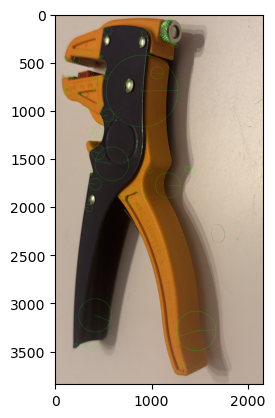

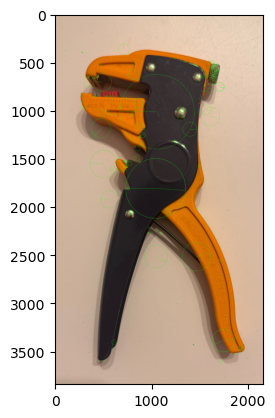

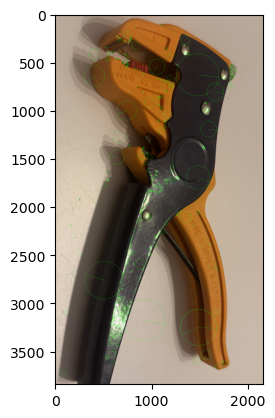

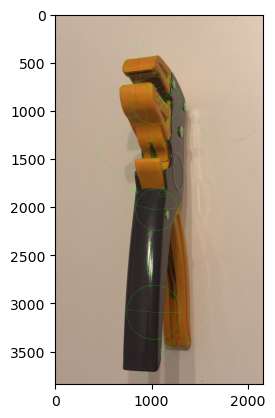

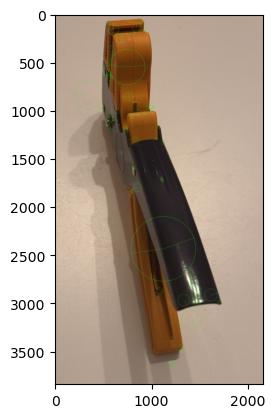

In [17]:
for file in img_data:
    draw_key_points(file, 5)

In [18]:
def sift(img1, img2, k_size: int = 5, max_matches: int = None):
    if k_size % 2 != 1:
        raise ValueError("Wrong kernel size value!")
    gimg1 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
    gimg1 = cv.medianBlur(gimg1, k_size)
    gimg2 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    gimg2 = cv.medianBlur(gimg2, k_size)
    siftobject = cv.SIFT.create()
    keypoints_1, descriptors_1 = siftobject.detectAndCompute(gimg1, None)
    keypoints_2, descriptors_2 = siftobject.detectAndCompute(gimg2, None)
    bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
    matches = bf.match(descriptors_1, descriptors_2)

    matches = sorted(matches, key=lambda x: x.distance)
    matched_img = cv.drawMatches(
        img2, keypoints_1, img1, keypoints_2, matches[:max_matches], img1, flags=2
    )
    show(matched_img)

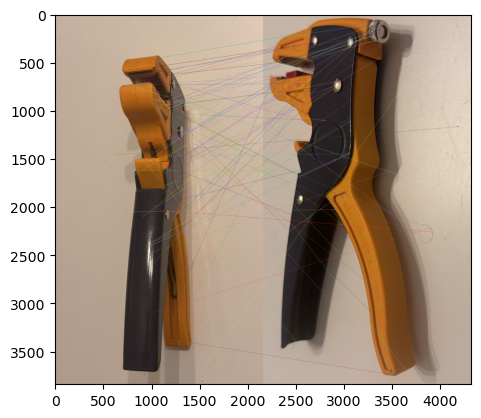

In [19]:
sift(img_data[0], img_data[3])

### Zad. 3 Dla każdej klatki filmu wybierz to zdjęcie które ma najwięcej dopasowań i wygeneruj nową klatkę na której jest wizualizacja dopasowań i oznaczenie szukanego elementu.

In [20]:
def gray_blur(img, k_size: int = 5):
    if k_size % 2 != 1:
        raise ValueError("Wrong kernel size value!")

    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray_img = cv.medianBlur(gray_img, k_size)

    return gray_img

In [126]:
def sift_max(img, img_data: List, is_show: bool = True):
    sift_object = cv.SIFT.create()
    bf_matcher = cv.BFMatcher(
        cv.NORM_L2, True
    )  # Using NORM_L2 for better matching with SIFT

    gray_img = gray_blur(img)
    keypoints_1, descriptors_1 = sift_object.detectAndCompute(gray_img, None)
    if descriptors_1 is None:
        raise ValueError("No descriptors found in reference image.")

    max_matches_count = 0
    best_match_img = None
    best_keypoints = None
    best_matches = None

    # Process each image in the dataset
    for image in img_data:
        gray_file = gray_blur(image)
        keypoints_2, descriptors_2 = sift_object.detectAndCompute(gray_file, None)

        if descriptors_2 is not None:
            matches = bf_matcher.match(descriptors_1, descriptors_2)
            matches = sorted(
                matches, key=lambda x: x.distance
            )  # Sort matches by their distance

            # good_matches = [m for m in matches if m.distance < 300]
            good_matches = matches
            if len(good_matches) > max_matches_count:
                max_matches_count = len(good_matches)
                best_match_img = image
                best_keypoints = keypoints_2
                best_matches = good_matches

    if best_match_img is not None and best_matches:
        matched_img = cv.drawMatches(
            img,
            keypoints_1,
            best_match_img,
            best_keypoints,
            best_matches,
            None,
            flags=cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS,
            matchColor=(0, 255, 0),
            matchesThickness=2,
        )
        if is_show:
            show(matched_img)
    else:
        print("No valid matches to draw.")
        matched_img = img 

    return matched_img

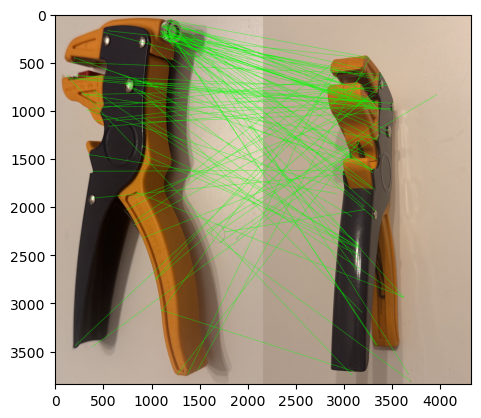

array([[[167, 182, 198],
        [168, 183, 199],
        [167, 182, 198],
        ...,
        [181, 200, 221],
        [181, 200, 221],
        [178, 197, 218]],

       [[167, 182, 198],
        [168, 183, 199],
        [167, 182, 198],
        ...,
        [181, 200, 221],
        [180, 199, 220],
        [177, 196, 217]],

       [[167, 182, 198],
        [168, 183, 199],
        [167, 182, 198],
        ...,
        [183, 202, 223],
        [181, 200, 221],
        [180, 199, 220]],

       ...,

       [[160, 173, 187],
        [161, 174, 188],
        [161, 174, 188],
        ...,
        [154, 169, 188],
        [154, 169, 188],
        [152, 167, 186]],

       [[161, 174, 188],
        [161, 174, 188],
        [162, 175, 189],
        ...,
        [153, 168, 187],
        [153, 168, 187],
        [151, 166, 185]],

       [[161, 174, 188],
        [161, 174, 188],
        [162, 175, 189],
        ...,
        [156, 171, 190],
        [155, 170, 189],
        [151, 166, 185]]

In [127]:
sift_max(img_data[0], img_data[3:])

In [102]:
video_path = "data/video.mp4"
video2_path = "data/video2.MOV"
width = 1080
height = 1920

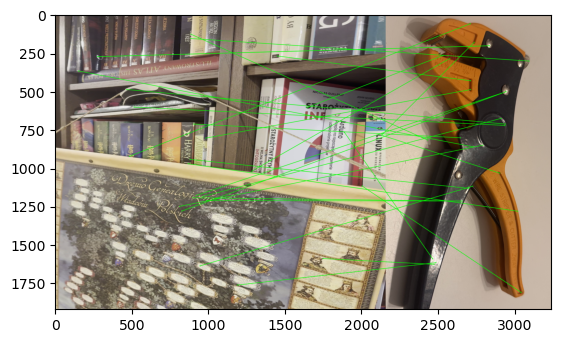

Frame size: 3240x1920


In [86]:
video = cv.VideoCapture(video_path)
fps = video.get(cv.CAP_PROP_FPS)
frame_count = int(video.get(cv.CAP_PROP_FRAME_COUNT))

frame = cv.resize(video.read()[1], (width, height))
video.release()

processed_frame = sift_max(frame, img_data_resized, is_show=False)
height, width, _ = processed_frame.shape

fourcc = cv.VideoWriter_fourcc(*"XVID")
output = cv.VideoWriter("test.avi", fourcc, fps, (width * 2, height))
output.write(cv.resize(processed_frame, (width * 2, height)))

output.release()

show(processed_frame)
print(f"Frame size: {width}x{height}")

In [113]:
img_data_resized = [cv.resize(img, (1080, 1920)) for img in img_data]

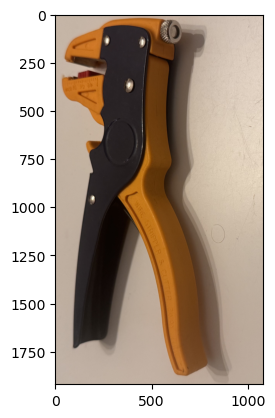

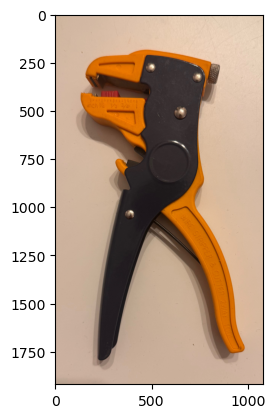

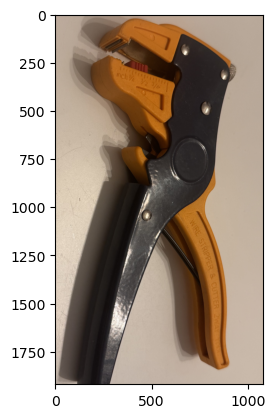

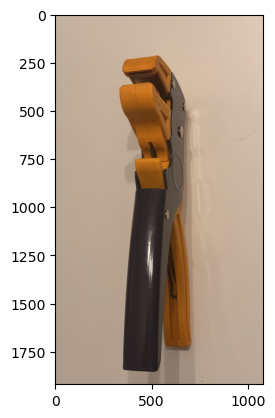

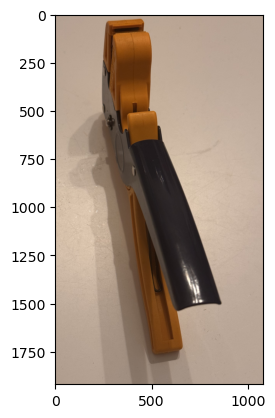

In [74]:
for img in img_data_resized:
    show(img)

In [106]:
video = cv.VideoCapture(video_path)
if not video.isOpened():
    print("Error: Could not open video")
    exit()

fps = video.get(cv.CAP_PROP_FPS)
frame_width = int(video.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(video.get(cv.CAP_PROP_FRAME_HEIGHT))


output_width = 1080 * 2
output_height = 1920

fourcc = cv.VideoWriter_fourcc(*"XVID") 
output = cv.VideoWriter("output3_sift.avi", fourcc, fps, (output_width, output_height)) 

if not output.isOpened():
    print("Error: Could not open output video")
    video.release()
    exit()

frame_count = int(video.get(cv.CAP_PROP_FRAME_COUNT))

for i in range(frame_count):
    ret, frame = video.read()
    if not ret:
        print("Video ended")
        break

    resized_frame = cv.resize(frame, (1080, 1920))
    after_fun_img = sift_max(resized_frame, img_data_resized, is_show=False)
    processed_frame = cv.resize(after_fun_img, (output_width, output_height)) 
    output.write(processed_frame)

    if i % 50 == 0:
        print(f"Frame {i}/{frame_count}")

video.release()
output.release()
print("Video processing finished")

Frame 0/227
Frame 50/227
Frame 100/227
Frame 150/227
Frame 200/227
Video processing finished


In [105]:
video.release()
output.release()

In [120]:
video = cv.VideoCapture(video2_path)
if not video.isOpened():
    print("Error: Could not open video")
    exit()

fps = video.get(cv.CAP_PROP_FPS)
frame_width = int(video.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(video.get(cv.CAP_PROP_FRAME_HEIGHT))

output_width = 1080 * 2
output_height = 1920

fourcc = cv.VideoWriter_fourcc(*"XVID") 
output = cv.VideoWriter("output2_sift.avi", fourcc, fps, (output_width, output_height)) 

if not output.isOpened():
    print("Error: Could not open output video")
    video.release()
    exit()

frame_count = int(video.get(cv.CAP_PROP_FRAME_COUNT))

for i in range(frame_count):
    ret, frame = video.read()
    if not ret:
        print("Video ended")
        break

    resized_frame = cv.resize(frame, (1080, 1920))
    after_fun_img = sift_max(resized_frame, img_data_resized, is_show=False)
    processed_frame = cv.resize(after_fun_img, (output_width, output_height))
    output.write(processed_frame)

    if i % 50 == 0:
        print(f"Frame {i}/{frame_count}")

video.release()
output.release()
print("Video processing finished")

Frame 0/591
Frame 50/591
Frame 100/591
Frame 150/591
Frame 200/591
Frame 250/591
Frame 300/591
Frame 350/591
Frame 400/591
Frame 450/591
Frame 500/591
Frame 550/591
Video processing finished


In [122]:
def make_video(video_path: str, img_data_resized: List, output_path: str, fun):
    video = cv.VideoCapture(video_path)
    if not video.isOpened():
        print("Error: Could not open video")
        exit()

    fps = video.get(cv.CAP_PROP_FPS)


    output_width = 1080 * 2
    output_height = 1920

    fourcc = cv.VideoWriter_fourcc(*"XVID") 
    output = cv.VideoWriter(output_path, fourcc, fps, (output_width, output_height)) 

    if not output.isOpened():
        print("Error: Could not open output video")
        video.release()
        exit()

    frame_count = int(video.get(cv.CAP_PROP_FRAME_COUNT))

    for i in range(frame_count):
        ret, frame = video.read()
        if not ret:
            print("Video ended")
            break

        resized_frame = cv.resize(frame, (1080, 1920))
        after_fun_img = fun(resized_frame, img_data_resized, is_show=False)
        processed_frame = cv.resize(after_fun_img, (output_width, output_height))
        output.write(processed_frame)

        if i % 50 == 0:
            print(f"Frame {i}/{frame_count}")

    video.release()
    output.release()
    print("Video processing finished")

In [128]:
make_video(video_path, img_data_resized, "output2137_sift.avi", sift_max)

Frame 0/227
Frame 50/227
Frame 100/227
Frame 150/227
Frame 200/227
Video processing finished


### Zad. 4 Wykonaj to samo przy pomocy algorytmu ORB.

In [124]:
def max_orb(img, img_data: List, is_show: bool = True):
    orb = cv.ORB_create()
    bf_matcher = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

    gray_img = gray_blur(img)
    keypoints_1, descriptors_1 = orb.detectAndCompute(gray_img, None)
    if descriptors_1 is None:
        raise ValueError("No descriptors found in reference image.")

    max_matches_count = 0
    best_match_img = None
    best_keypoints = None
    best_matches = None

    for image in img_data:
        gray_file = gray_blur(image)
        keypoints_2, descriptors_2 = orb.detectAndCompute(gray_file, None)

        if descriptors_2 is not None:
            matches = bf_matcher.match(descriptors_1, descriptors_2)
            matches = sorted(matches, key=lambda x: x.distance)

            good_matches = [m for m in matches if m.distance < 300]

            if len(good_matches) > max_matches_count:
                max_matches_count = len(good_matches)
                best_match_img = image
                best_keypoints = keypoints_2
                best_matches = good_matches

    if best_match_img is not None and best_matches:
        matched_img = cv.drawMatches(
            img,
            keypoints_1,
            best_match_img,
            best_keypoints,
            best_matches,
            None,
            flags=cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS,
            matchColor=(0, 255, 0),
            matchesThickness=2,
        )
        if is_show:
            show(matched_img)
    else:
        print("No valid matches to draw.")
        matched_img = img

    return matched_img

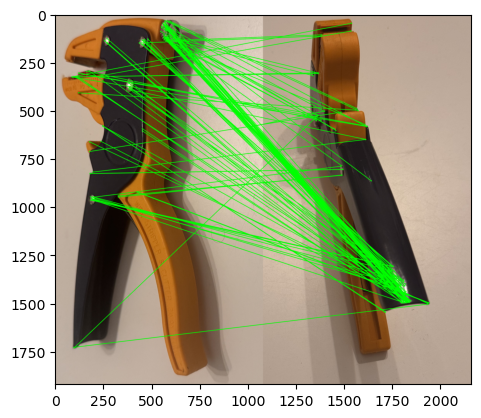

array([[[168, 183, 199],
        [166, 181, 197],
        [166, 181, 197],
        ...,
        [ 89, 100, 122],
        [ 84,  95, 117],
        [ 76,  87, 109]],

       [[168, 183, 199],
        [167, 182, 198],
        [167, 182, 198],
        ...,
        [ 97, 108, 130],
        [ 91, 102, 124],
        [ 83,  94, 116]],

       [[167, 182, 198],
        [169, 184, 200],
        [168, 183, 199],
        ...,
        [101, 112, 134],
        [100, 111, 133],
        [ 94, 105, 127]],

       ...,

       [[162, 175, 189],
        [163, 176, 190],
        [164, 177, 191],
        ...,
        [149, 163, 182],
        [146, 160, 179],
        [148, 162, 181]],

       [[160, 173, 187],
        [161, 174, 188],
        [163, 176, 190],
        ...,
        [152, 166, 185],
        [148, 162, 181],
        [150, 164, 183]],

       [[161, 174, 188],
        [162, 175, 189],
        [163, 176, 190],
        ...,
        [151, 165, 184],
        [148, 162, 181],
        [146, 160, 179]]

In [115]:
max_orb(img_data_resized[0], img_data_resized[1:])

In [123]:
make_video(video2_path, img_data_resized, "output1_orb.avi", max_orb)

Frame 0/591
Frame 50/591
Frame 100/591
Frame 150/591
Frame 200/591
Frame 250/591
Frame 300/591
Frame 350/591
Frame 400/591
Frame 450/591
Frame 500/591
Frame 550/591
Video processing finished


In [125]:
make_video(video_path, img_data_resized, "output2_orb.avi", max_orb)


Frame 0/227
Frame 50/227
Frame 100/227
Frame 150/227
Frame 200/227
Video processing finished
